## **Librerias**

In [1]:
# test_Matematicas.py

import numpy as np
import math
import random
import time
import sys
import matplotlib.pyplot as plt

from matematicas import (
    sum_alt, sqrt, factorial, gamma, logaritmo, seno, coseno, tangente,
    angulo_a_radianes, radianes_a_angulo, media, mediana, varianza,
    desviacion_estandar, covarianza, std, correlacion, suma_vec, resta_vec,
    crear_matriz_ceros, crear_matriz_identidad, suma_matrices, resta_matrices,
    producto_matrices, multiplicacion_escalar, matriz_transpuesta, 
    diagonal_matriz, inversa_matriz, determinante_matriz, matriz_adjunta,
    norma_vector, producto_punto, producto_cruz, covarianza_matriz,
    correlacion_matriz, limite, derivada, integral, regresion_lineal,
    transposicion_matriz, matriz_cofactores
)

from matematicas import matematica_ascii, PI, E


## **Funciones**

In [2]:


""" 
   ▄▄▄▄▀ ▄███▄     ▄▄▄▄▄      ▄▄▄▄▀ 
▀▀▀ █    █▀   ▀   █     ▀▄ ▀▀▀ █    
    █    ██▄▄   ▄  ▀▀▀▀▄       █    
   █     █▄   ▄▀ ▀▄▄▄▄▀       █     
  ▀      ▀███▀               ▀      
                                    
"""

"""
def test_suma_alt():
    array = [random.randint(0, 10) for _ in range(10)]
    assert sum_alt(array) == np.sum(array)
    array_2d = np.random.rand(3, 3)
    assert np.allclose(sum_alt(array_2d, eje=0), np.sum(array_2d, axis=0))
"""

def test_sqrt():
    x = random.uniform(0, 100)
    assert abs(sqrt(x) - math.sqrt(x)) < 1e-10

def test_factorial():
    n = random.randint(0, 100)
    assert factorial(n) == math.factorial(n)

def test_gamma():
    n = random.choice([random.randint(1, 10), 0.5])
    try:
        assert abs(gamma(n) - math.gamma(n)) < 1e-10
    except ValueError as e:
        print(f"ValueError for gamma({n}): {e}")

def test_logaritmo():
    x = random.uniform(1, 100)
    base = random.uniform(2, 10)
    assert abs(logaritmo(x, base) - math.log(x, base)) < 1e-10

def test_trigonometricas():
    x = random.uniform(-2*math.pi, 2*math.pi)
    assert abs(seno(x) - math.sin(x)) < 1e-10
    assert abs(coseno(x) - math.cos(x)) < 1e-10
    assert abs(tangente(x) - math.tan(x)) < 1e-10

def test_conversiones_angulos():
    angulo = random.uniform(0, 360)
    radianes = random.uniform(0, 2*math.pi)
    assert abs(angulo_a_radianes(angulo) - math.radians(angulo)) < 1e-10
    assert abs(radianes_a_angulo(radianes) - math.degrees(radianes)) < 1e-10
    
def test_estadisticas():
    data = [random.uniform(0, 100) for _ in range(10)]
    assert abs(media(data) - np.mean(data)) < 1e-10
    assert abs(mediana(data) - np.median(data)) < 1e-10
    assert abs(varianza(data) - np.var(data)) < 1e-10
    assert abs(std(data) - np.std(data, ddof=0)) < 1e-10
    
def test_covarianza_correlacion():
    x = [random.uniform(0, 100) for _ in range(10)]
    y = [random.uniform(0, 100) for _ in range(10)]
    assert abs(covarianza(x, y) - np.cov(x, y, bias=True)[0][1]) < 1e-10
    assert abs(correlacion(x, y) - np.corrcoef(x, y)[0][1]) < 1e-10

def test_operaciones_vectores():
    v = [random.uniform(0, 10) for _ in range(10)]
    w = [random.uniform(0, 10) for _ in range(10)]
    assert np.allclose(suma_vec(v, w), np.add(v, w))
    assert np.allclose(resta_vec(v, w), np.subtract(v, w))
    assert abs(norma_vector(v) - np.linalg.norm(v)) < 1e-10
    assert abs(producto_punto(v, w) - np.dot(v, w)) < 1e-10

def test_matrices():
    A = np.random.rand(3, 3)
    B = np.random.rand(3, 3)
    assert np.allclose(suma_matrices(A, B), np.add(A, B))
    assert np.allclose(resta_matrices(A, B), np.subtract(A, B))
    assert np.allclose(producto_matrices(A, B), np.dot(A, B))
    assert np.allclose(multiplicacion_escalar(A, 2), np.multiply(A, 2))
    assert np.allclose(matriz_transpuesta(A), np.transpose(A))

def test_limites_derivadas():
    f = lambda x: x**2
    x = random.uniform(0.1, 10)
    h = 1e-5
    try:
        limite_derecha = limite(f, x, 'derecha')
        limite_izquierda = limite(f, x, 'izquierda')
        assert abs(limite_derecha - limite_izquierda) < 1e-10
        derivada_val = derivada(f, x, h)
        expected_val = 2 * x
        assert abs(derivada_val - expected_val) < 1e-9  # Aumentar la tolerancia a 1e-9
    except ValueError as e:
        print(f"ValueError for limite or derivada at x={x}: {e}")
    except AssertionError as ae:
        print(f"AssertionError: {ae}, x={x}, h={h}, derivada_val={derivada_val}, expected_val={expected_val}")

def test_regresion():
    x = [random.uniform(0, 10) for _ in range(10)]
    y = [2 * xi + 1 + random.uniform(-1, 1) for xi in x]
    a, b = regresion_lineal(x, y)
    a_np, b_np = np.polyfit(x, y, 1)
    assert abs(a - a_np) < 1e-10
    assert abs(b - b_np) < 1e-10

def test_transposicion_matriz():
    A = np.random.rand(3, 3)
    assert np.allclose(transposicion_matriz(A), np.transpose(A))

def test_diagonal_matriz():
    A = np.random.rand(3, 3)
    assert np.allclose(diagonal_matriz(A), np.diag(A).reshape(-1, 1))

def test_inversa_matriz():
    A = np.random.rand(3, 3)
    while np.linalg.det(A) == 0:  # Ensure matrix is invertible
        A = np.random.rand(3, 3)
    assert np.allclose(inversa_matriz(A), np.linalg.inv(A))

def test_determinante_matriz():
    A = np.random.rand(3, 3)
    assert abs(determinante_matriz(A) - np.linalg.det(A)) < 1e-10

def test_matriz_adjunta():
    A = np.random.rand(3, 3)
    adj = np.linalg.inv(A).T * np.linalg.det(A)
    assert np.allclose(matriz_adjunta(A), adj)

def test_matriz_cofactores():
    A = np.random.rand(3, 3)
    i, j = 1, 1
    cofactores = matriz_cofactores(A, i, j)
    cofactores_esperados = np.delete(np.delete(A, i, axis=0), j, axis=1)
    assert np.allclose(cofactores, cofactores_esperados)

def test_producto_cruz():
    v1 = [random.uniform(0, 10) for _ in range(3)]
    v2 = [random.uniform(0, 10) for _ in range(3)]
    assert np.allclose(producto_cruz(v1, v2), np.cross(v1, v2))

def test_covarianza_matriz():
    matriz = np.random.rand(10, 3)
    calculada = covarianza_matriz(matriz)
    esperada = np.cov(matriz, rowvar=False)
    # print("Calculada:\n", calculada)
    # print("Esperada:\n", esperada)
    assert np.allclose(calculada, esperada)

def test_correlacion_matriz():
    matriz = np.random.rand(10, 3)
    correlacion_calculada = correlacion_matriz(matriz)
    correlacion_esperada = np.corrcoef(matriz, rowvar=False)
    # print("Calculada:\n", correlacion_calculada)
    # print("Esperada:\n", correlacion_esperada)
    assert np.allclose(correlacion_calculada, correlacion_esperada)


In [3]:

""" 
██      ▄▄▄▄▄   ▄█▄    ▄█ ▄█ 
█ █    █     ▀▄ █▀ ▀▄  ██ ██ 
█▄▄█ ▄  ▀▀▀▀▄   █   ▀  ██ ██ 
█  █  ▀▄▄▄▄▀    █▄  ▄▀ ▐█ ▐█ 
   █            ▀███▀   ▐  ▐ 
  █                          
 ▀                           
"""

# Funciones ACII para interfaz de usuario en terminal
def barra_de_carga(tiempo_espera=0.1):
    barra = ["[          ]", "[=         ]", "[==        ]", "[===       ]", "[====      ]", 
             "[=====     ]", "[======    ]", "[=======   ]", "[========  ]", "[========= ]", "[==========]"]
    for i in range(11):
        sys.stdout.write("\r" + barra[i % len(barra)])
        sys.stdout.flush()
        time.sleep(tiempo_espera / 100)
    sys.stdout.write("\r[==========] \u2713 Prueba exitosa\n")
    sys.stdout.flush()

def ejecutar_prueba(funcion_prueba, nombre):
    barra_de_carga()
    try:
        funcion_prueba()
        print(f"{nombre} completada.\n")
    except Exception as e:
        print(f"Error en {nombre}: {e}\n")
# importar variables globales de matematica.py
from Matematicas import matematica_ascii, PI, E

def main():
    print(matematica_ascii)  
    print(" Codigo creado por : Ignacio A.")
    print(" Fecha de creacion: 25/05/2024")
    print(" Ultima modificacion: 29/05/2024")
    print(" Version: 0.1")
    
    print("")
    print("")
    
    numero_de_pruebas = int(input("Ingrese el numero de pruebas a realizar: "))
    print("")
    
    pruebas = [
        (test_sqrt, "test_sqrt"),
        (test_factorial, "test_factorial"),
        (test_gamma, "test_gamma"),
        (test_logaritmo, "test_logaritmo"),
        (test_trigonometricas, "test_trigonometricas"),
        (test_conversiones_angulos, "test_conversiones_angulos"),
        (test_estadisticas, "test_estadisticas"),
        (test_covarianza_correlacion, "test_covarianza_correlacion"),
        (test_operaciones_vectores, "test_operaciones_vectores"),
        (test_matrices, "test_matrices"),
        (test_limites_derivadas, "test_limites_derivadas"),
        (test_regresion, "test_regresion"),
        (test_transposicion_matriz, "test_transposicion_matriz"),
        (test_diagonal_matriz, "test_diagonal_matriz"),
        (test_inversa_matriz, "test_inversa_matriz"),
        (test_determinante_matriz, "test_determinante_matriz"),
        (test_matriz_adjunta, "test_matriz_adjunta"),
        (test_matriz_cofactores, "test_matriz_cofactores"),
        (test_producto_cruz, "test_producto_cruz"),
        (test_covarianza_matriz, "test_covarianza_matriz"),
        (test_correlacion_matriz, "test_correlacion_matriz")
    ]
  
      
    for funcion_prueba, nombre in pruebas:
        for i in range(numero_de_pruebas):
            print(f"Iniciando {nombre}...")
            ejecutar_prueba(funcion_prueba, nombre)
        



## **test** 

In [4]:

if __name__ == "__main__":
    main()
    


█ ▄▄ ▀▄    ▄ █▀▄▀█ ██     ▄▄▄▄▀ ▄  █ 
█   █  █  █  █ █ █ █ █ ▀▀▀ █   █   █ 
█▀▀▀    ▀█   █ ▄ █ █▄▄█    █   ██▀▀█ 
█       █    █   █ █  █   █    █   █ 
 █    ▄▀        █     █  ▀        █  
  ▀            ▀     █           ▀   
                    ▀                

 Codigo creado por : Ignacio A.
 Fecha de creacion: 25/05/2024
 Ultima modificacion: 29/05/2024
 Version: 0.1



Iniciando test_sqrt...
[==========] ✓ Prueba exitosa
test_sqrt completada.

Iniciando test_sqrt...
[==========] ✓ Prueba exitosa
test_sqrt completada.

Iniciando test_sqrt...
[==========] ✓ Prueba exitosa
test_sqrt completada.

Iniciando test_sqrt...
[==========] ✓ Prueba exitosa
test_sqrt completada.

Iniciando test_sqrt...
[==========] ✓ Prueba exitosa
test_sqrt completada.

Iniciando test_factorial...
[==========] ✓ Prueba exitosa
test_factorial completada.

Iniciando test_factorial...
[==========] ✓ Prueba exitosa
test_factorial completada.

Iniciando test_factorial...
[==========] ✓ Prueba exitosa
test_fact

## **Integrales Inv**

In [9]:
import numpy as np
from scipy.optimize import minimize

def aproximacion_laplace_integral(f, x_range, n_points=100):
    """
    Aproxima la integral de una función utilizando la aproximación de Laplace.
    
    Args:
    f (callable): La función a integrar.
    x_range (tuple): Tupla que contiene los límites de integración (a, b).
    n_points (int): Número de puntos para evaluar la integral aproximada.
    
    Returns:
    float: Valor aproximado de la integral.
    """
    # Definir el rango de x
    a, b = x_range
    
    # Encontrar el punto donde f alcanza su máximo
    result = minimize(lambda x: -f(x), x0=[(a + b) / 2])
    x_max = result.x[0]
    
    # Calcular el máximo y la segunda derivada en ese punto
    f_max = f(x_max)
    h = 1e-5  # pequeño valor para el cálculo de la derivada segunda
    second_derivative = (f(x_max + h) - 2 * f(x_max) + f(x_max - h)) / h**2
    
    # Aproximación de la integral de la gaussiana
    sigma = np.sqrt(-1 / second_derivative)  # desviación estándar de la gaussiana
    integral_aprox = f_max * np.sqrt(2 * np.pi * sigma**2)
    
    return integral_aprox

# Ejemplo de uso
f = lambda x: -x**2 + 4*x  # Una función simple para testear
integral_aproximada = aproximacion_laplace_integral(f, (0, 2))
print("Integral aproximada:", integral_aproximada)


Integral aproximada: 7.089807239052887


In [ ]:


#  Vamos a realizar distintas integrales
#  Y distintas aproximaciones 


# Vamos a abarcar distintos tipos de funciones para testear y crear datos de manera 
# generalizada. 
# 1. Funciones polinomiales
# 2. Funciones trigonometricas y trigonometricas inversas
# 3. Funciones exponenciales y logaritmicas
# 4. Funciones hiperbolicas y sus inversas
# 5. Funciones especiales
# ejemplo : funciones de bessel, funciones de error, funciones Sinc, Ci y Si.
# 6. Funciones racionales y fraccionarias 


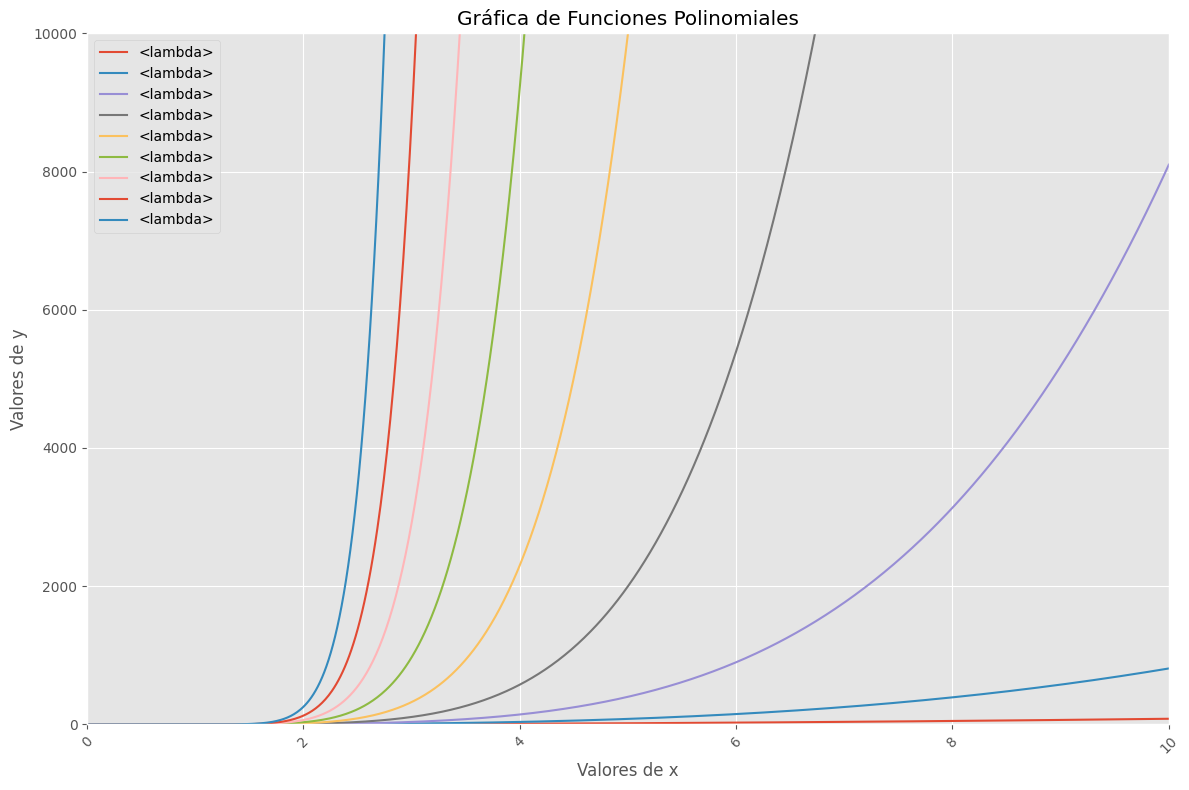

In [11]:

# Definición de funciones polinomiales
f1 = lambda x: x**2 - 2*x + 1
f2 = lambda x: x**3 - 2*x**2 + x - 1
f3 = lambda x: x**4 - 2*x**3 + x**2 - 1
f4 = lambda x: x**5 - 2*x**4 + x**3 - 1
f5 = lambda x: x**6 - 2*x**5 + x**4 - 1
f6 = lambda x: x**7 - 2*x**6 + x**5 - 1
f7 = lambda x: x**8 - 2*x**7 + x**6 - 1
f8 = lambda x: x**9 - 2*x**8 + x**7 - 1
f9 = lambda x: x**10 - 2*x**9 + x**8 - 1

# Lista de funciones
lista_funciones = [f1, f2, f3, f4, f5, f6, f7, f8, f9]

# Función para graficar la lista de funciones
def plot_funciones(lista_funciones, x_range=(-20, 20), y_range=(-10000, 10000), n_points=1000):
    x = np.linspace(*x_range, n_points)
    plt.style.use('ggplot')
    plt.figure(figsize=(12, 8))
    for f in lista_funciones:
        plt.plot(x, f(x), label=f.__name__)
    plt.legend()
    plt.title('Gráfica de Funciones Polinomiales')
    plt.xlabel('Valores de x')
    plt.ylabel('Valores de y')
    plt.grid(True)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ejecutar la función para graficar
plot_funciones(lista_funciones, x_range=(0, 10), y_range=(0, 10000), n_points=1000)
